<a href="https://colab.research.google.com/github/Pabloskking/Probabilidad-y-Estad-stica/blob/main/Unidad1/Pr%C3%A1ctica_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilidad y Estadística

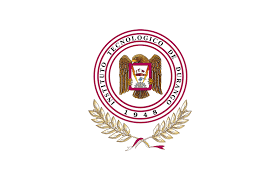

## **Unidad 1**

*   **Práctica 6: ** *Estadistica descriptiva del Dataset Autos*

**Grupo:** 2Y

**Alumno:** Juan Pablo Soriano González

**Docente:** Dr. José Gabriel Rodríguez Rivas



---





## **1.- Cargar el Dataset de Autos y realizar las Estadísticas descriptivas básicas y medidas de tendencia central**



In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statistics import *

In [3]:
autos = pd.read_csv("autos2.csv", encoding = "ISO-8859-1")

In [4]:
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Valores Maximos y minimos de los precios de los autos

In [5]:
autos.price.max()

45400.0

In [6]:
autos.price.min()

5118.0

### Media, mediana y moda de los precios de los autos

In [22]:
# Media
Precios = autos['price'].dropna()

media = sum(precios) / len(autos.price)
print(media)

12949.429268292683


In [9]:
# Mediana
mediana = median(autos.price)
print(mediana)

18150.0


In [10]:
# Moda
moda = multimode(autos.price)
print(moda)

[16500.0, 5572.0, 7957.0, 6229.0, 6692.0, 7609.0, 8921.0, 7295.0, 8845.0, 8495.0, 9279.0, 13499.0, 18150.0, 7775.0, 7898.0]


### Desviación estandar de los precios de los autos

In [11]:
desviacion_estandar_precioa = autos.price.std()
print(desviacion_estandar_precioa)

7947.066341939271


### Estadisticos y cuartiles de los precios de los autos

In [12]:
autos.price.describe()

,price
count,201.000000
mean,13207.129353
std,7947.066342
min,5118.000000
25%,7775.000000
50%,10295.000000
75%,16500.000000
max,45400.000000




---



# **2.-Realizar un Histograma de precios de los automóviles**

In [13]:
import math

In [14]:
df = pd.DataFrame({'Precios': autos.price})
df

,Precios
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [15]:
# Calcular el número de intervalos utilizando la regla de Sturges
n = len(autos.price)
k = int( 1 + math.log2(100))
print("Valor de n = ", n , " \nNúmero de intervalos =", k)

Valor de n =  205  
Número de intervalos = 7


In [16]:
# Crear la tabla de frecuencias

tabla_frecuencia = pd.cut( df['Precios'], bins=k, include_lowest=True).value_counts().reset_index()
tabla_frecuencia.columns = ['Clase', 'Frec']
tabla_frecuencia

,Clase,Frec
0,"(5077.717, 10872.571]",105
1,"(10872.571, 16627.143]",49
2,"(16627.143, 22381.714]",26
3,"(33890.857, 39645.429]",7
4,"(28136.286, 33890.857]",6
5,"(22381.714, 28136.286]",5
6,"(39645.429, 45400.0]",3


In [17]:
# Ordenar la tabla de frecuencia por el intervalo
tabla_frecuencia = tabla_frecuencia.sort_values(by='Clase')
tabla_frecuencia

,Clase,Frec
0,"(5077.717, 10872.571]",105
1,"(10872.571, 16627.143]",49
2,"(16627.143, 22381.714]",26
5,"(22381.714, 28136.286]",5
4,"(28136.286, 33890.857]",6
3,"(33890.857, 39645.429]",7
6,"(39645.429, 45400.0]",3


In [18]:
# Generar columnas siguientes
tabla_frecuencia['Frec Rel'] = tabla_frecuencia['Frec'] / n
tabla_frecuencia['Frec Porc'] = tabla_frecuencia['Frec'] / n * 100
tabla_frecuencia['Frec Ac'] = tabla_frecuencia['Frec'].cumsum()
tabla_frecuencia['Frec Rel Ac'] = tabla_frecuencia['Frec Rel'].cumsum()
tabla_frecuencia['Frec Porc Ac'] = tabla_frecuencia['Frec Porc'].cumsum()

# Mostrar la tabla de frecuencia
print(tabla_frecuencia)

                    Clase  Frec  Frec Rel  Frec Porc  Frec Ac  Frec Rel Ac  \
0   (5077.717, 10872.571]   105  0.512195  51.219512      105     0.512195   
1  (10872.571, 16627.143]    49  0.239024  23.902439      154     0.751220   
2  (16627.143, 22381.714]    26  0.126829  12.682927      180     0.878049   
5  (22381.714, 28136.286]     5  0.024390   2.439024      185     0.902439   
4  (28136.286, 33890.857]     6  0.029268   2.926829      191     0.931707   
3  (33890.857, 39645.429]     7  0.034146   3.414634      198     0.965854   
6    (39645.429, 45400.0]     3  0.014634   1.463415      201     0.980488   

   Frec Porc Ac  
0     51.219512  
1     75.121951  
2     87.804878  
5     90.243902  
4     93.170732  
3     96.585366  
6     98.048780  


Text(0, 0.5, 'Autos')

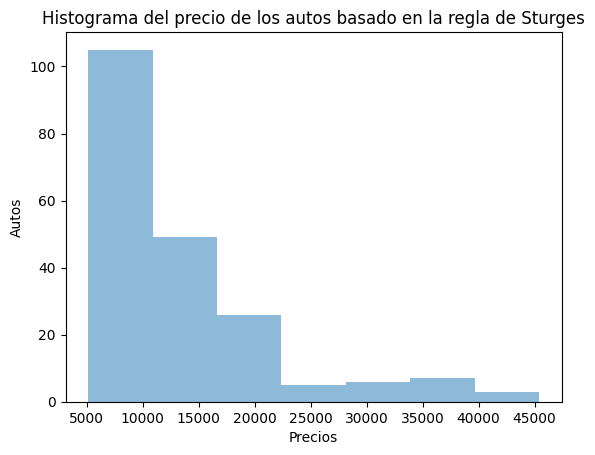

In [19]:
# Crear un histograma basado en la tabla de frecuencia
plt.hist(df['Precios'], bins=k, alpha = 0.5)
plt.title('Histograma del precio de los autos basado en la regla de Sturges')
plt.xlabel('Precios')
plt.ylabel('Autos')

### Conclusiones:

Podemos observar que la mayor cantidad de autos vendidos se concentra entre los 5000 dllrs y los 10000 dllrs, y apartir de este ultimo va disminuyendo significativamente hasta los 2500 dllr, donde podemos observar que ya solo se mantienen bajo los 10 autos vendidos.  



---



## **3.- Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo de vehículo (body style)**

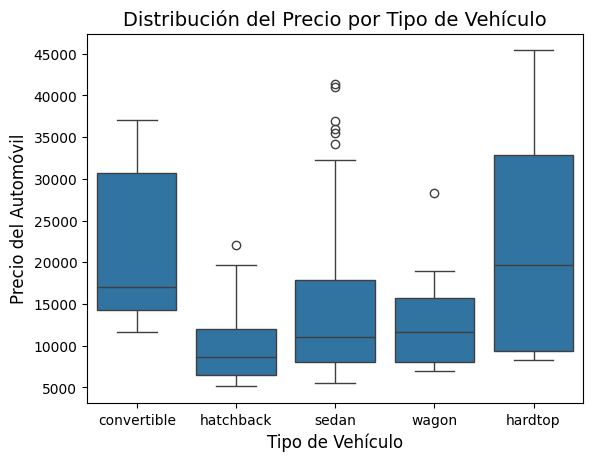

In [23]:
sns.boxplot(x='body-style', y='price', data = autos)
plt.title('Distribución del Precio por Tipo de Vehículo', fontsize=14)
plt.xlabel('Tipo de Vehículo', fontsize=12)
plt.ylabel('Precio del Automóvil', fontsize=12)
plt.show()

## Conclusiones:

Tenemos que los autos más baratos son los hatchback, wagon y sedan, estos últimos con algunos valores atípicos que llegan hasta los 42000 dllrs. Los convertibles, son un poco más caros pero con mucho rango de 15000 a 31000. Por último, los hardtop, tienen la variación más completa de precios, desde 10000 a 34000.

---

# 4.- Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo tracción ruedas (drive wheels)

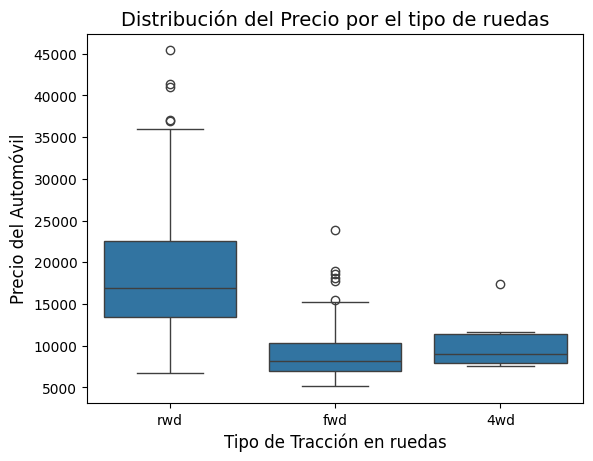

In [24]:
sns.boxplot(x='drive-wheels', y='price', data = autos)
plt.title('Distribución del Precio por el tipo de ruedas', fontsize=14)
plt.xlabel('Tipo de Tracción en ruedas', fontsize=12)
plt.ylabel('Precio del Automóvil', fontsize=12)
plt.show()

## Conclusiones:

Podemos decir que los autos con RWD son los más caros, por el hecho de tener una mediana alta y un rango de precios amplio, incluyendo valores atípicos elevados. Los autos con FWD son los más económicos, con una mediana baja y precios concentrados en un rango reducido. Los autos con 4WD tienen precios intermedios, con una mediana más alta que los FWD y pocos valores atípicos.

---

# 5.- Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y la ubicación del motor (engine-location)

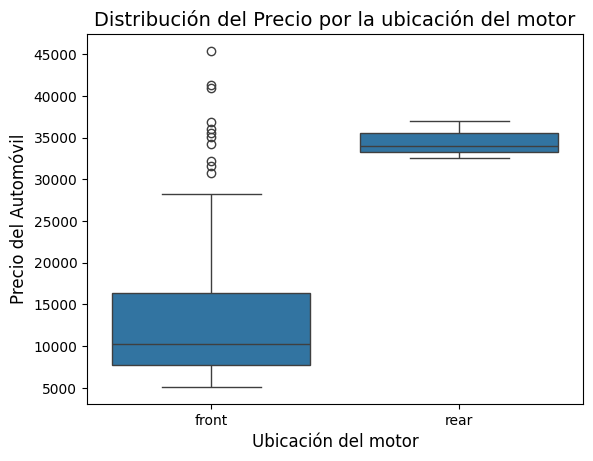

In [25]:
sns.boxplot(x='engine-location', y='price', data = autos)
plt.title('Distribución del Precio por la ubicación del motor', fontsize=14)
plt.xlabel('Ubicación del motor', fontsize=12)
plt.ylabel('Precio del Automóvil', fontsize=12)
plt.show()

## Conclusiones:

Aquí se puede observar como la ubicación frontal supera por mucho en cuestión de popularidad a la ubicación trasera pues se nota que el precio frontal ronda los costos bajos, aunque con algunos valores atípicos  a diferencia con la parte trasera, donde su costo supera los 30000 dllrs aún siendo muy poco escogida

---

# 6.- Conclusiones generales de la práctica.

En general, el análisis reveló que los precios de los autos están relacionados con factores como el tipo de rueda y la ubicación del motor. Al centrarse en un factor clave como el precio, se pudo observar que la mayoría de los autos se encuentran en un rango de precios moderado, entre 5000 y 20000 dllrs.

Los resultados mostraron que los convertibles y hardtops son los vehículos más costosos, mientras que los hatchbacks son más asequibles. En cuanto a la tracción, los autos con tracción trasera y en las cuatro ruedas son más caros, mientras que los de tracción delantera son más económicos y populares debido a su accesibilidad y practicidad para el uso urbano.

En resumen, el estudio demostró que los precios de los autos están influenciados por varios factores y que la mayoría de los compradores optan por vehículos más asequibles con tracción delantera.